Libraries required to run the code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression
from IPython.display import display
import statistics
import math

Read data from CSV and adding square of features x1 and x2 into data

In [2]:
df = pd.read_csv("data_week2.csv", names=["x1", "x2", "y"], header=None, comment='#')
display(df.head())
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
x1_2 = x1 ** 2
x2_2 = x2 ** 2 
x = np.column_stack((x1, x2, x1_2, x2_2))
y = df.iloc[:,2]
df_new = pd.DataFrame({"x1":x1, "x2":x2, "x1_2":x1_2, "x2_2":x2_2, "y":y})
display(df_new.head())

,x1,x2,y
0,-0.82,-0.67,1
1,-0.95,-0.09,1
2,0.06,0.28,-1
3,-0.06,-0.95,1
4,0.22,0.58,-1


,x1,x2,x1_2,x2_2,y
0,-0.82,-0.67,0.6724,0.4489,1
1,-0.95,-0.09,0.9025,0.0081,1
2,0.06,0.28,0.0036,0.0784,-1
3,-0.06,-0.95,0.0036,0.9025,1
4,0.22,0.58,0.0484,0.3364,-1


Training Logistic Regression model for old features x1 and x2 along with x1_2 and x2_2

In [3]:
LRModel = LogisticRegression(solver='lbfgs', penalty="none")
LRModel.fit(x, y)

LogisticRegression(penalty='none')

In [4]:
#y=m1 x1 + m2 x2 + c
LRModel.coef_

array([[  0.60078225, -23.69179069,  25.25742067,  -0.33099177]])

Extracting model coefficients and intercept

In [5]:
m1 = LRModel.coef_[0,0]
m2 = LRModel.coef_[0,1]
m3 = LRModel.coef_[0,2]
m4 = LRModel.coef_[0,3]
c = LRModel.intercept_[0]

model_params_df = pd.DataFrame({"Coefficient 1":[m1], "Coefficient 2":[m2], "Coefficient 3":[m3], "Coefficient 4":[m4], "Intercept":[c]})
display(model_params_df)

,Coefficient 1,Coefficient 2,Coefficient 3,Coefficient 4,Intercept
0,0.600782,-23.691791,25.257421,-0.330992,-0.24384


Using the trained model to get predictions

In [6]:
prdctns = LRModel.predict(x)

Scatter plot showing Actual VS Predicted value Y label

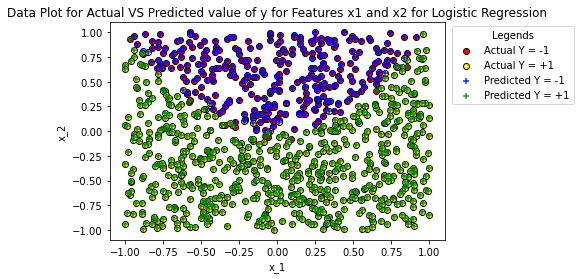

In [7]:
plot.scatter(x1[y == -1], x2[y == -1], color='red', marker="o", edgecolors="black")
plot.scatter(x1[y == 1], x2[y == 1], color='yellow', marker="o", edgecolors="black")
plot.scatter(x1[prdctns == -1], x2[prdctns == -1], color='blue', marker="+", alpha=0.85)
plot.scatter(x1[prdctns == 1], x2[prdctns == 1], color='green', marker="+", alpha=0.85)
plot.title('Data Plot for Actual VS Predicted value of y for Features x1 and x2 for Logistic Regression')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Actual Y = -1', 'Actual Y = +1', 'Predicted Y = -1', 'Predicted Y = +1'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.4, 0.6))
plot.show()

Evaluating performance of the model

In [8]:
y_postive = np.count_nonzero(y == 1)
y_negative = np.count_nonzero(y == -1)

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(len(y)) : 
    if y[i] == 1 and prdctns[i] == 1 : 
        true_positive += 1
    elif y[i] == -1 and prdctns[i] == -1 :
        true_negative += 1
    elif y[i] == 1 and prdctns[i] == -1 :
        false_negative += 1
    elif y[i] == -1 and prdctns[i] == 1 :
        false_positive += 1

Accuracy = ((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)) * 100

y_pos_1_correctly_predicted = (true_positive/y_postive)*100

y_neg_1_correctly_predicted = (true_negative/y_negative)*100

actual_predicted_df = pd.DataFrame({"True Positive":[true_positive], "True Negative":[true_negative], "False Positive":[false_positive], "False Negative":[false_negative], "Accuracy":[Accuracy], "Label Y = 1 Accuracy":[y_pos_1_correctly_predicted], "Label Y = -1 Accuracy":[y_neg_1_correctly_predicted]})
display(actual_predicted_df)

,True Positive,True Negative,False Positive,False Negative,Accuracy,Label Y = 1 Accuracy,Label Y = -1 Accuracy
0,661,310,14,14,97.197197,97.925926,95.679012


# Baseline Model

Initialising the baseline model and getting predictions from the model

In [9]:
y_postive = np.count_nonzero(y == 1)
y_negative = np.count_nonzero(y == -1)

actual_predicted_df = pd.DataFrame({"Actual Positive":[y_postive], "Actual Negative":[y_negative]})
display(actual_predicted_df)

baseline_model_prediction = np.ones(len(y))

,Actual Positive,Actual Negative
0,675,324


Scatter plot showing Actual VS Predicted value Y label for baseline model

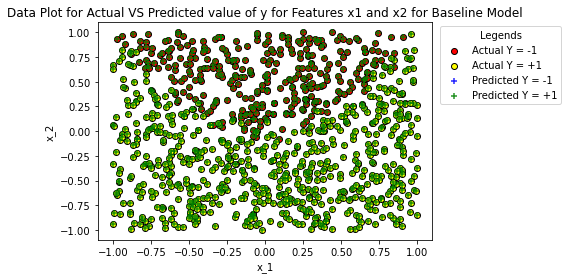

In [10]:
plot.scatter(x1[y == -1], x2[y == -1], color='red', marker="o", edgecolors="black")
plot.scatter(x1[y == 1], x2[y == 1], color='yellow', marker="o", edgecolors="black")
plot.scatter(x1[baseline_model_prediction == -1], x2[baseline_model_prediction == -1], color='blue', marker="+", alpha=0.85)
plot.scatter(x1[baseline_model_prediction == 1], x2[baseline_model_prediction == 1], color='green', marker="+", alpha=0.85)
plot.title('Data Plot for Actual VS Predicted value of y for Features x1 and x2 for Baseline Model')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Actual Y = -1', 'Actual Y = +1', 'Predicted Y = -1', 'Predicted Y = +1'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.4, 0.6))
plot.show()

Evaluating performance of the baseline model

In [11]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for i in range(len(y)) : 
    if y[i] == 1 and baseline_model_prediction[i] == 1 : 
        true_positive += 1
    elif y[i] == -1 and baseline_model_prediction[i] == -1 :
        true_negative += 1
    elif y[i] == 1 and baseline_model_prediction[i] == -1 :
        false_negative += 1
    elif y[i] == -1 and baseline_model_prediction[i] == 1 :
        false_positive += 1

Accuracy = ((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)) * 100

y_pos_1_correctly_predicted = (true_positive/y_postive)*100

y_neg_1_correctly_predicted = (true_negative/y_negative)*100

actual_predicted_df = pd.DataFrame({"True Positive":[true_positive], "True Negative":[true_negative], "False Positive":[false_positive], "False Negative":[false_negative], "Accuracy":[Accuracy], "Label Y = 1 Accuracy":[y_pos_1_correctly_predicted], "Label Y = -1 Accuracy":[y_neg_1_correctly_predicted]})
display(actual_predicted_df)

,True Positive,True Negative,False Positive,False Negative,Accuracy,Label Y = 1 Accuracy,Label Y = -1 Accuracy
0,675,0,324,0,67.567568,100.0,0.0


Identifying the decision boundary for Logistic Regression model with 4 features

In [12]:
x1_cons = []

for i in range(len(x1)) : 
    x1_cons.append(m1*x1[i] + m3*x1_2[i] + c)

dcsn_bndry = []
for i in range(len(x1_cons)) : 
    numerator = (m2 ** 2) - (4 * m4 * x1_cons[i]) 
    root1 = ( -m2 + math.sqrt(numerator) ) / (2 * m4) 
    root2 = ( -m2 - math.sqrt(numerator) ) / (2 * m4) 
    if -1 <= root1 <= 1 :
        dcsn_bndry.append(root1)
    else : 
        dcsn_bndry.append(root2)

Scatter plot showing Actual VS Predicted value Y label and decsion boundary

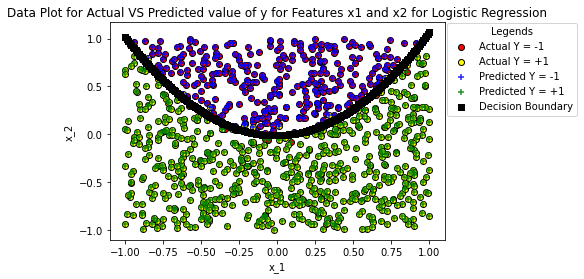

In [13]:
plot.scatter(x1[y == -1], x2[y == -1], color='red', marker="o", edgecolors="black")
plot.scatter(x1[y == 1], x2[y == 1], color='yellow', marker="o", edgecolors="black")
plot.scatter(x1[prdctns == -1], x2[prdctns == -1], color='blue', marker="+", alpha=0.85)
plot.scatter(x1[prdctns == 1], x2[prdctns == 1], color='green', marker="+", alpha=0.85)
plot.scatter(x1, dcsn_bndry, marker = "s", color = "black")
plot.title('Data Plot for Actual VS Predicted value of y for Features x1 and x2 for Logistic Regression')
plot.xlabel("x_1")
plot.ylabel("x_2")
plot.legend(['Actual Y = -1', 'Actual Y = +1', 'Predicted Y = -1', 'Predicted Y = +1', 'Decision Boundary'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.41, 0.548))
plot.show()